# Steps to perform : 
1. Handing Data imbalance using ADASYN
2. Feature Scaling
3. Dimentionality reduction using PCA
4. Machine Learning Models with evaluation report.

# Pre-requisite:
    Ensure datafolder and required csv datafile is in place before running the code. If you are running this notebook into Jupyter notebook, ensure to mount the drive and file exists on the drive.

In [1]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Output_CSV/Dataset_Step4_Processed_Data_Revised.csv"

In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
import pandas as pd
print('pandas  : {}'.format(pd.__version__)) #Rationale 
import numpy as np
print ('numpy   : {}'.format(np.__version__))
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


pandas  : 0.25.1
numpy   : 1.19.4


In [4]:
#Read the dataset from clean datafile

df_train = pd.read_csv(dataFolder +'/' + datafile)
df_train.head()
#Read the dataset from GDrive
#Inputfile = 'drive/My Drive/Colab_Notebooks/Input_Dataset_Without_TF-IDF.csv'
#df_train = pd.read_csv(Inputfile)
#df_train.head()



,Consumerdisputed,ComplaintID,Month_Received,Year_Sent,Month_Sent,Day_Sent,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,1,1347613,4,2015,4,26,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,1,1685130,12,2015,12,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1,10631,1,2012,1,9,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,1489180,7,2015,7,27,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1,795636,4,2014,4,6,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Feature Scaling of train Data Sets except Target and Indent variable

In [5]:
df_train.shape

(100311, 142)

In [6]:
df_train.columns

Index(['Consumerdisputed', 'ComplaintID', 'Month_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'Week_Received', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=142)

In [7]:
df_train.rename(columns = {'Complaint ID':'ComplaintID'}, inplace = True)

In [8]:
temp = df_train.copy()

In [9]:
colsTobedropped = ['Consumerdisputed', 
                  'ComplaintID'
                             ]
temp  = temp.drop(colsTobedropped,axis = 1)
print(temp.columns)

Index(['Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Mortgage',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=140)


In [10]:
temp.shape

(100311, 140)

In [11]:
scaledCols = temp.columns

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[scaledCols] = scaler.fit_transform(df_train[scaledCols])

In [13]:
df_train.shape

(100311, 142)

In [14]:
#Final X training Data
X = df_train.reindex(columns=scaledCols)

#Target Y Variable Consumer disputed as 0 or 1
y = df_train['Consumerdisputed'].values

#Preserving ComplaintID for providing final output results, will not be used for training data
p_ComplaintID = df_train['ComplaintID'].values

In [15]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_val, y_train, y_val , trainComplaintID , valComplaintID = train_test_split(df_train, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_train['Consumerdisputed'])


In [16]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_val distribution of label '1': {} \n".format(sum(y_val == 1))) 
print("y_val distribution of label '0': {} \n".format(sum(y_val == 0)))

y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

y_val distribution of label '1': 9203 

y_val distribution of label '0': 20891 



# Handling Data Imbalance 

Imbalance ratio (IR): The ratio of the number of instances in the majority class to the number of examples in the minority class.
IR = (negative_class/positive_class)
Where positive_class is the number of minority class samples and negative_class is the number of majority class samples.

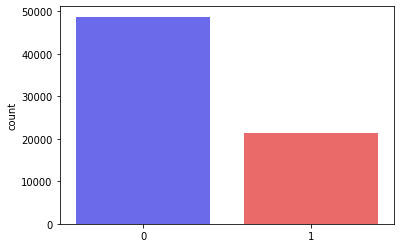

In [17]:
sns.countplot(x=y_train, palette='seismic');

In [18]:
class_count_0, class_count_1 = df_train['Consumerdisputed'].value_counts()
print ("Consumers Not disputed:",class_count_0)
print ("Consumers disputed:",class_count_1)
IR = class_count_1/class_count_0 #Minority CLass/Majority CLass
print ("Class Imbalance Ratio:",IR)

Consumers Not disputed: 69634
Consumers disputed: 30677
Class Imbalance Ratio: 0.44054628486084385


# Dimensional reduction and features selection

In [19]:
pca_columns = []
for i in range(X.shape[1]):
    pca_columns.append('PC' + str(i+1))
    
pca_model = PCA()
pca_model.fit(X)
X_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)

In [20]:
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.204761 dtype: float64
2,PC3,Explained Info 0.31747 dtype: float64
3,PC4,Explained Info 0.401489 dtype: float64
4,PC5,Explained Info 0.471021 dtype: float64
5,PC6,Explained Info 0.527071 dtype: float64
6,PC7,Explained Info 0.568048 dtype: float64
7,PC8,Explained Info 0.608649 dtype: float64
8,PC9,Explained Info 0.64717 dtype: float64
9,PC10,Explained Info 0.678818 dtype: float64


In [21]:
pca_columns = []
for i in range(25):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 25)
pca_model.fit(X)
df_pca_train = pd.DataFrame(pca_model.transform(X), columns = pca_columns)

In [22]:
x_train, x_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(df_pca_train, y, p_ComplaintID , test_size = 0.3,random_state = 17 , stratify = df_train['Consumerdisputed'])

In [23]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_val distribution of label '1': {} \n".format(sum(y_val == 1))) 
print("y_val distribution of label '0': {} \n".format(sum(y_val == 0)))


y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

y_val distribution of label '1': 9203 

y_val distribution of label '0': 20891 



In [24]:
totalFeature = X_train.columns
len(totalFeature)

142

# Methods to handle imbalance dataset

1. Random under-sampling & over-sampling with imblearn: Generate new samples in the minority classes or Under-sample the majority class(es) by randomly picking samples with or without replacement.The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler is the library for it. 

2. Under-sampling: Tomek links : Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

3. Synthetic Minority Oversampling Technique (SMOTE): This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

4. NearMiss : NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

5. Penalize Algorithms (Cost-Sensitive Training) : Penalized learning algorithms that increase the cost of classification mistakes on the minority class.A popular algorithm for this technique is Penalized-SVM.

6. ADASYN : The adaptive synthetic sampling approach, or ADASYN algorithm,builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.


In [25]:
from imblearn.over_sampling import SMOTE, ADASYN 

<class 'pandas.core.frame.DataFrame'>


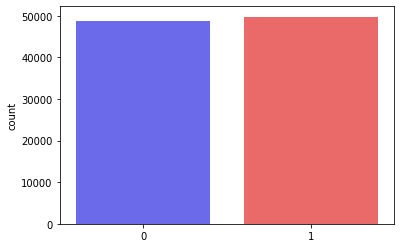

In [26]:
oversample = ADASYN()
x_train_res, y_train_res = oversample.fit_resample(x_train, y_train)
print (type(x_train_res))
sns.countplot(x=y_train_res, palette='seismic');

In [27]:
#Dataframe to csv
#x_train_res.to_csv(dataFolder+"/X_train_Balanaced_Dataset.csv",index=False)
#x_test.to_csv(dataFolder+"/X_test_Dataset.csv",index=False)

#Numpy array to CSV
#np.savetxt(dataFolder+"/Y_train_Balanaced_Dataset.csv", y_train_res, delimiter=",")
#np.savetxt(dataFolder+"/Y_test_Dataset.csv", y_test, delimiter=",")

In [28]:
#np.savetxt(dataFolder+"/Y_train_Balanaced_Dataset.csv", y_train_res, delimiter=",")
#np.savetxt(dataFolder+"/Y_test_Dataset.csv", y_test, delimiter=",")

In [29]:
class_count_1=0
class_count_0=0
for class_type in y_train_res:
    if (class_type == 1):
        class_count_1 = class_count_1 + 1
    else:
        class_count_0 = class_count_0 + 1
print ("Consumers Not disputed:",class_count_0)
print ("Consumers disputed:",class_count_1)
IR = class_count_1/class_count_0 #Minority CLass/Majority CLass
print ("Class Imbalance Ratio:",IR)

Consumers Not disputed: 48743
Consumers disputed: 49767
Class Imbalance Ratio: 1.0210081447592474


In [30]:
#checking y_train distribution
print("Before Over Sampling")
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))
print("----------------------------------")
#checking y_train distribution
print("After Over Sampling")
print("y_train_res distribution of label '1': {} \n".format(sum(y_train_res == 1))) 
print("y_train_res distribution of label '0': {} \n".format(sum(y_train_res == 0)))
print("----------------------------------")

#checking y_test distribution
print("y_test distribution of label '1': {} \n".format(sum(y_test == 1))) 
print("y_test distribution of label '0': {} \n".format(sum(y_test == 0)))

Before Over Sampling
y_train distribution of label '1': 21474 

y_train distribution of label '0': 48743 

----------------------------------
After Over Sampling
y_train_res distribution of label '1': 49767 

y_train_res distribution of label '0': 48743 

----------------------------------
y_test distribution of label '1': 9203 

y_test distribution of label '0': 20891 



In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [32]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(model)
    plt.show()
from sklearn.metrics import cohen_kappa_score
def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    # Cohen's kappa
    cohenKappa = cohen_kappa_score(y_test, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    #print('COHEN KAPPA SCORE: ')
    #print ("{0:.3f}".format(cohenKappa))
    print('****************************************************************************************')

def classification_report_csv(algo_name,y_test, y_predicted):
    report = classification_report(y_test, y_predicted, output_dict=True)
    df = pd.DataFrame(report).transpose()
    # Create a Pandas Excel writer using XlsxWriter as the engine.
    writer = pd.ExcelWriter("Model_Output.xlsx", engine='xlsxwriter')

    # Convert the dataframe to an XlsxWriter Excel object.
    df.to_excel(writer, sheet_name=algo_name)

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

In [33]:
def predict_with_decisionTree(X_train, y_train, X_test):
    """
    This method creates a model using Decision Tree classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train.ravel())
    dt_y_predict = model.predict(X_test)
    return dt_y_predict

def predict_with_SVM(X_train, y_train, X_test):
    """
    This method creates a model using SVM classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    #model = svm.SVC(gamma='scale', kernel ='rbf', degree = 3) 
    model = LinearSVC(random_state=0, tol=1e-5)
    # RBF Kernel
    # Train the model using the training sets
    model.fit(X_train, y_train.ravel())
    #Predict the response for test dataset
    svm_y_pred = model.predict(X_test)
    return svm_y_pred

def predict_with_randomForest(X_train, y_train, X_test):
    """
    This method creates a model using Random forest classifier and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set
    """
    
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    forest_y_predict = model.predict(X_test)
    return forest_y_predict

def predict_with_xGBoost(X_train, y_train, X_test):
    """
    This method creates a model using XGBoost and predicts the output
    X_train: The training data set
    y_train: The label of training data set
    X_test: The test data set  
    """
    model = XGBClassifier(max_depth=2)
    model.fit(X_train, y_train)
    xgboost_y_predict = model.predict(X_test)
    return xgboost_y_predict, model

def write_predictions_to_csv(dataToWrite, file):
    fullAttrList = dataToWrite.keys()
    dfToWrite = pd.DataFrame( columns = fullAttrList)
    for key,val in dataToWrite.items():
        dfToWrite[key] = val
    dfToWrite.to_csv(file, index=False)    

In [34]:
SKLearn_Model_Data = {}
Model_accuracy = {}

In [35]:
def classification_report_csv(algo_name,y_test, y_predicted):
    #df_header = header_line_csv(algo_name)
    report = classification_report(y_test, y_predicted, output_dict=True,target_names=['Consumer Not Disputed', 'Consumer Disputed'])
    df = pd.DataFrame(report).transpose()
    df.insert(loc=0, column='Algorithm Name', value=algo_name)
    return df



*************************************************************************************
FOR Random Forest without ADASYN:
ACCURACY: 0.6275004984382269
F1 SCORE: 0.28498532976144914
CONFUSION MATRIX: 
[[16650  4241]
 [ 6969  2234]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      0.80      0.75     20891
           1       0.35      0.24      0.28      9203

    accuracy                           0.63     30094
   macro avg       0.52      0.52      0.52     30094
weighted avg       0.59      0.63      0.61     30094

****************************************************************************************
AUC roc_auc_score: 0.5198704255879749


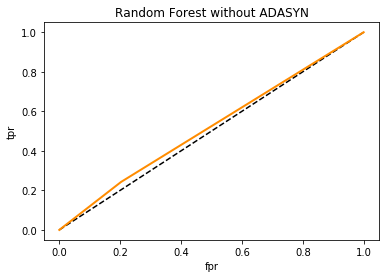



*************************************************************************************
FOR Random Forest with ADASYN:
ACCURACY: 0.5860968963913072
F1 SCORE: 0.3461417322834646
CONFUSION MATRIX: 
[[14341  6550]
 [ 5906  3297]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     20891
           1       0.33      0.36      0.35      9203

    accuracy                           0.59     30094
   macro avg       0.52      0.52      0.52     30094
weighted avg       0.59      0.59      0.59     30094

****************************************************************************************
AUC roc_auc_score: 0.522360300321222


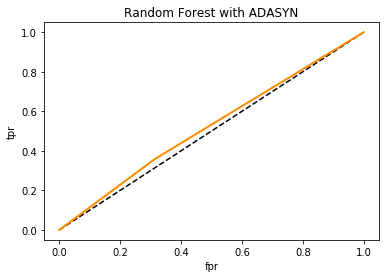

In [62]:
df_final = pd.DataFrame()
#Predict the model with random forest with pre-processed data without ADASYN
forest_y_predict = predict_with_randomForest(x_train, y_train, x_test)
forest_y_predict_smote = predict_with_randomForest(x_train_res, y_train_res, x_test)

#Evaluate random forest without ADASYN
getModelReport("Random Forest without ADASYN", y_test, forest_y_predict)
plot_roc_curve("Random Forest without ADASYN",y_test, forest_y_predict)
df1 = classification_report_csv("Random Forest without ADASYN",y_test,forest_y_predict)
df_final= pd.concat([df_final,df1])

#Evaluate random forest with ADASYN
getModelReport("Random Forest with ADASYN", y_test, forest_y_predict_smote)
plot_roc_curve("Random Forest with ADASYN",y_test, forest_y_predict_smote)
df2 = classification_report_csv("Random Forest with ADASYN",y_test,forest_y_predict_smote)
df_final= pd.concat([df_final,df2])

In [63]:
print (df1)
print (df2)

                                     Algorithm Name  precision    recall  \
Consumer Not Disputed  Random Forest without ADASYN   0.704941  0.796994   
Consumer Disputed      Random Forest without ADASYN   0.345019  0.242747   
accuracy               Random Forest without ADASYN   0.627500  0.627500   
macro avg              Random Forest without ADASYN   0.524980  0.519870   
weighted avg           Random Forest without ADASYN   0.594874  0.627500   

                       f1-score     support  
Consumer Not Disputed  0.748146  20891.0000  
Consumer Disputed      0.284985   9203.0000  
accuracy               0.627500      0.6275  
macro avg              0.516566  30094.0000  
weighted avg           0.606508  30094.0000  
                                  Algorithm Name  precision    recall  \
Consumer Not Disputed  Random Forest with ADASYN   0.708302  0.686468   
Consumer Disputed      Random Forest with ADASYN   0.334823  0.358253   
accuracy               Random Forest with ADASYN



*************************************************************************************
FOR XGBoost without ADASYN:
ACCURACY: 0.6954542433707716
F1 SCORE: 0.014833924540470816
CONFUSION MATRIX: 
[[20860    31]
 [ 9134    69]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     20891
           1       0.69      0.01      0.01      9203

    accuracy                           0.70     30094
   macro avg       0.69      0.50      0.42     30094
weighted avg       0.69      0.70      0.57     30094

****************************************************************************************
AUC roc_auc_score: 0.5030068312798688


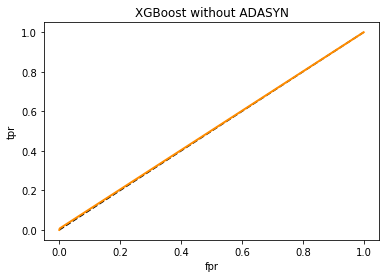



*************************************************************************************
FOR XGBoost with ADASYN:
ACCURACY: 0.523293679803283
F1 SCORE: 0.4766525609222238
CONFUSION MATRIX: 
[[ 9215 11676]
 [ 2670  6533]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.78      0.44      0.56     20891
           1       0.36      0.71      0.48      9203

    accuracy                           0.52     30094
   macro avg       0.57      0.58      0.52     30094
weighted avg       0.65      0.52      0.54     30094

****************************************************************************************
AUC roc_auc_score: 0.5754881259075835


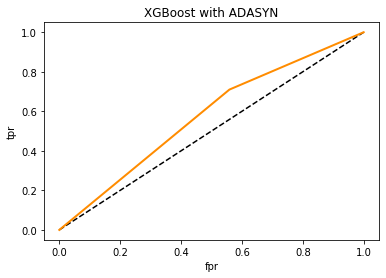

In [64]:
xgboost_y_predict,model1_xgboost = predict_with_xGBoost(x_train, y_train, x_test)
#print(X_train.shape)
xgboost_y_predict_smote,model2_xgboost = predict_with_xGBoost(x_train_res, y_train_res, x_test)

#Evaluate XGBoost without SMOTE
getModelReport("XGBoost without ADASYN", y_test, xgboost_y_predict)
plot_roc_curve("XGBoost without ADASYN",y_test, xgboost_y_predict)
df3 = classification_report_csv("XGBoost without ADASYN",y_test,xgboost_y_predict)
df_final= pd.concat([df_final,df3])
#Evaluate XGBoost with SMOTE
getModelReport("XGBoost with ADASYN", y_test, xgboost_y_predict_smote)
plot_roc_curve("XGBoost with ADASYN",y_test, xgboost_y_predict_smote)
df4 = classification_report_csv("XGBoost with ADASYN",y_test,xgboost_y_predict_smote)

df_final= pd.concat([df_final,df4])

In [65]:
df4

,Algorithm Name,precision,recall,f1-score,support
Consumer Not Disputed,XGBoost with ADASYN,0.775347,0.441099,0.562302,20891.000000
Consumer Disputed,XGBoost with ADASYN,0.358779,0.709877,0.476653,9203.000000
accuracy,XGBoost with ADASYN,0.523294,0.523294,0.523294,0.523294
macro avg,XGBoost with ADASYN,0.567063,0.575488,0.519477,30094.000000
weighted avg,XGBoost with ADASYN,0.647957,0.523294,0.536109,30094.000000


[[17291  3600]
 [ 7219  1984]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.76     20891
           1       0.36      0.22      0.27      9203

    accuracy                           0.64     30094
   macro avg       0.53      0.52      0.52     30094
weighted avg       0.60      0.64      0.61     30094

0.640493121552469


*************************************************************************************
FOR KNN without ADASYN:
ACCURACY: 0.640493121552469
F1 SCORE: 0.26834381551362685
CONFUSION MATRIX: 
[[17291  3600]
 [ 7219  1984]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.76     20891
           1       0.36      0.22      0.27      9203

    accuracy                           0.64     30094
   macro avg       0.53      0.52      0.52     30094
weighted avg       0.60      0.64      0.61     30094

*****************************************************

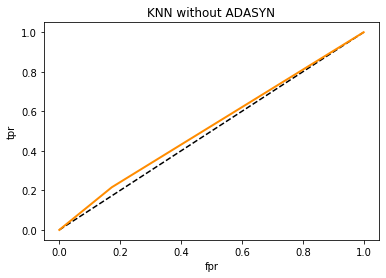

With ADASYN
[[11461  9430]
 [ 4622  4581]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62     20891
           1       0.33      0.50      0.39      9203

    accuracy                           0.53     30094
   macro avg       0.52      0.52      0.51     30094
weighted avg       0.59      0.53      0.55     30094

0.533063069050309


*************************************************************************************
FOR KNN with ADASYN:
ACCURACY: 0.533063069050309
F1 SCORE: 0.39467562677694495
CONFUSION MATRIX: 
[[11461  9430]
 [ 4622  4581]]
CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

           0       0.71      0.55      0.62     20891
           1       0.33      0.50      0.39      9203

    accuracy                           0.53     30094
   macro avg       0.52      0.52      0.51     30094
weighted avg       0.59      0.53      0.55     30094

********************************************

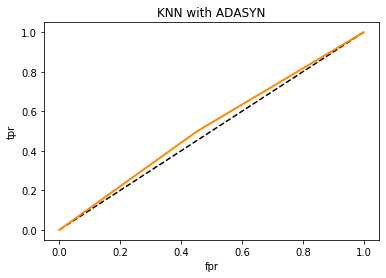

In [67]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNN_model.fit(x_train, y_train)
KNN_prediction = KNN_model.predict(x_test)
print(confusion_matrix(y_test,KNN_prediction))
print(classification_report(y_test,KNN_prediction))
print(accuracy_score(y_test, KNN_prediction))
#Evaluate KNN without ADASYN
getModelReport("KNN without ADASYN", y_test, KNN_prediction)
plot_roc_curve("KNN without ADASYN",y_test, KNN_prediction)
df5 = classification_report_csv("KNN without ADASYN",y_test,KNN_prediction)
df_final= pd.concat([df_final,df5])

print ("With ADASYN")
KNN_model_Smote = KNeighborsClassifier(n_neighbors=5)
KNN_model_Smote.fit(x_train_res, y_train_res)
KNN_prediction_Smote = KNN_model_Smote.predict(x_test)
print(confusion_matrix(y_test,KNN_prediction_Smote))
print(classification_report(y_test,KNN_prediction_Smote))
print(accuracy_score(y_test, KNN_prediction_Smote))
#Evaluate XGBoost without ADASYN
getModelReport("KNN with ADASYN", y_test, KNN_prediction_Smote)
plot_roc_curve("KNN with ADASYN",y_test, KNN_prediction_Smote)
df6 = classification_report_csv("KNN with ADASYN",y_test,KNN_prediction_Smote)
df_final= pd.concat([df_final,df6])


In [68]:
print (df5)
print (df6)

                           Algorithm Name  precision    recall  f1-score  \
Consumer Not Disputed  KNN without ADASYN   0.705467  0.827677  0.761701   
Consumer Disputed      KNN without ADASYN   0.355301  0.215582  0.268344   
accuracy               KNN without ADASYN   0.640493  0.640493  0.640493   
macro avg              KNN without ADASYN   0.530384  0.521629  0.515023   
weighted avg           KNN without ADASYN   0.598383  0.640493  0.610828   

                            support  
Consumer Not Disputed  20891.000000  
Consumer Disputed       9203.000000  
accuracy                   0.640493  
macro avg              30094.000000  
weighted avg           30094.000000  
                        Algorithm Name  precision    recall  f1-score  \
Consumer Not Disputed  KNN with ADASYN   0.712616  0.548609  0.619949   
Consumer Disputed      KNN with ADASYN   0.326957  0.497772  0.394676   
accuracy               KNN with ADASYN   0.533063  0.533063  0.533063   
macro avg              

In [70]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("Step#7_Model_Output.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_final.to_excel(writer, sheet_name="ML_models")

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Predicting probabilities - XGBoost 

In [40]:
df_test = x_test.copy()
df_test['class'] = y_test.tolist()
df_test['ComplaintID']=valComplaintID.tolist()
df_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,class,ComplaintID
36155,-0.415373,0.289411,0.578897,-0.694105,-0.310558,-0.239637,-0.250730,0.373738,-0.378467,-0.123512,...,-0.007635,0.036097,0.147090,0.006786,-0.173668,0.070655,0.003330,-0.017869,0,535735
57324,1.470994,-0.854097,-0.145305,-0.578250,-0.057688,-0.546163,0.421904,-0.410432,-0.082989,-0.073433,...,-0.036780,0.028931,0.069220,-0.002492,0.009982,-0.029472,0.051194,-0.106430,0,336747
58075,1.451123,-0.844778,-0.157374,-0.573530,-0.116051,0.762479,-0.123148,0.127478,-0.112673,-0.025982,...,0.003874,0.003505,0.020276,-0.009027,-0.010830,-0.005163,-0.010296,0.105549,0,964230
16019,1.453859,-0.852209,-0.154940,-0.587708,-0.154627,0.010611,0.179233,0.483559,-0.113047,-0.016550,...,0.006715,-0.002032,0.009930,-0.009403,-0.011650,-0.006055,-0.001155,0.048988,1,1076298
92487,1.545431,-0.776884,0.093807,0.223947,-0.235647,0.200464,0.059558,-0.763931,-0.091150,-0.140317,...,0.093926,-0.030868,-0.098633,-0.001700,-0.057896,0.020450,-0.010655,0.021527,0,1736592


In [41]:
#predicting probabilities
prob=model2_xgboost.predict_proba(x_test)
print(prob)

[[0.4407652  0.5592348 ]
 [0.44832003 0.55167997]
 [0.43885577 0.56114423]
 ...
 [0.47945976 0.52054024]
 [0.4340849  0.5659151 ]
 [0.59738606 0.40261394]]


In [42]:
#Extracting the "0" and "1" probabilities to individual lists 
prob0=[]
prob1=[]

for i in range (0,len(prob)): 
    temp = prob[i]
    temp1=temp[0]
    temp2=temp[1]
    prob0.append(temp1)
    prob1.append(temp2)

In [43]:
test_ComplainID=df_test.filter(items=["ComplaintID"])

In [44]:
test_ComplainID['Original_Class']=y_test
test_ComplainID['Predicted_Class'] = xgboost_y_predict_smote
test_ComplainID['UnDisputed_class_Probability'] = prob0
test_ComplainID['Disputed_class_Prob'] = prob1

In [45]:
test_ComplainID.head(10)

,ComplaintID,Original_Class,Predicted_Class,UnDisputed_class_Probability,Disputed_class_Prob
36155,535735,0,1,0.440765,0.559235
57324,336747,0,1,0.448320,0.551680
58075,964230,0,1,0.438856,0.561144
16019,1076298,1,1,0.467481,0.532519
92487,1736592,0,0,0.651571,0.348429
21296,126116,1,1,0.369612,0.630388
69914,561194,0,0,0.508644,0.491356
54529,1329077,0,1,0.425668,0.574332
38568,1396988,0,0,0.575070,0.424930
69984,1801229,0,0,0.537910,0.462090


In [46]:
#Saving the final results as excel file back 
test_ComplainID.to_excel(dataFolder + "/Test_Probabilities/CustomerComplaint_XGBoost.xlsx") 

# Saving the model as a pickel, retrieving the model and testing the model¶

In [47]:
import pickle #Importing pickel libraries to save the model for future useimport pickle #Importing pickel libraries to save the model for future use

In [48]:
# now to save the model as serialized object pickle

with open('XGBoost_Model_pickle', 'wb') as model:
    pickle.dump(model2_xgboost,model)

In [49]:
#Testing the saved model
#now we will load the saved model
with open('XGBoost_Model_pickle', 'rb') as file:
    loaded_model = pickle.load(file)

In [50]:
x_test.shape #Should be equal to number of PCA components considered excluding ComplaintTD & Targetclass

(30094, 25)

In [51]:
y1_predict_test = loaded_model.predict(x_test)

In [52]:
print(y1_predict_test)

[1 1 1 ... 1 1 0]
